Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [13]:
df = pd.read_csv("crime_data.csv")

In [14]:
df=df.rename({'Unnamed: 0':'na'},axis=1)
df

,na,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [15]:
df.drop(columns=['na'], inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


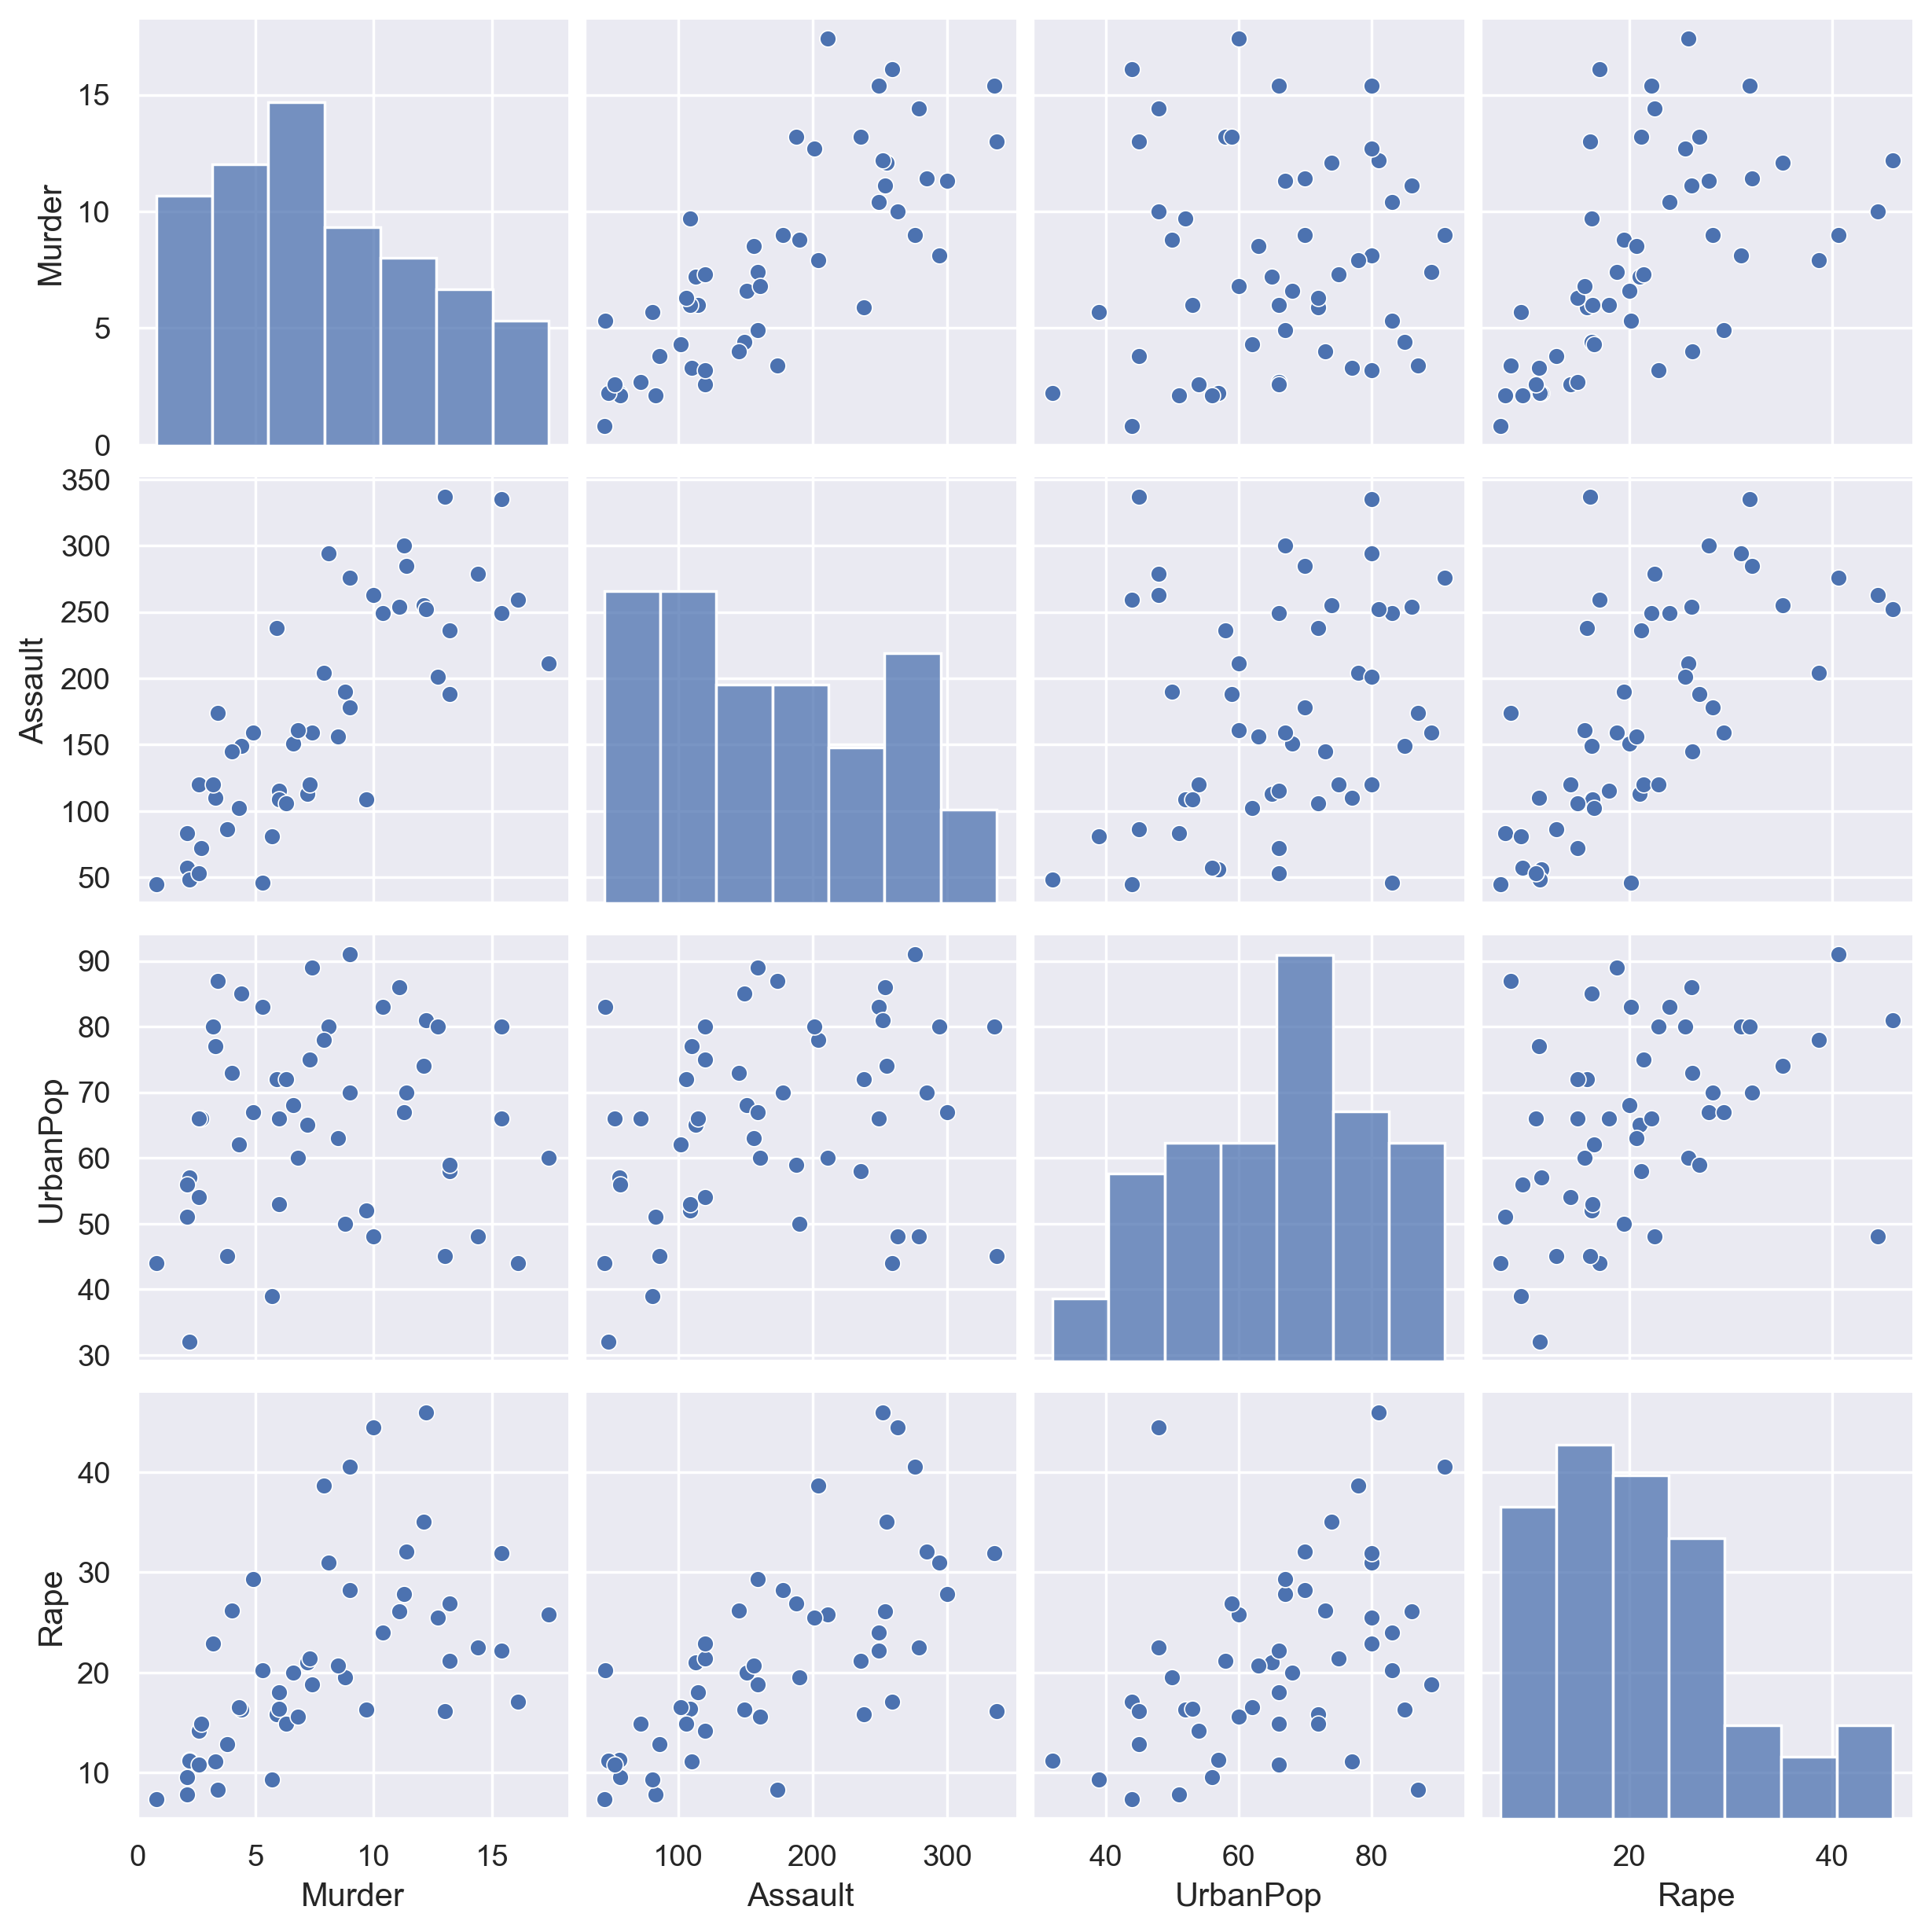

In [16]:
sns.pairplot(df)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [19]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [20]:
pd.DataFrame(x, columns= df.columns)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [ ]:
#heirachal clustering 

In [21]:
from scipy.cluster import hierarchy

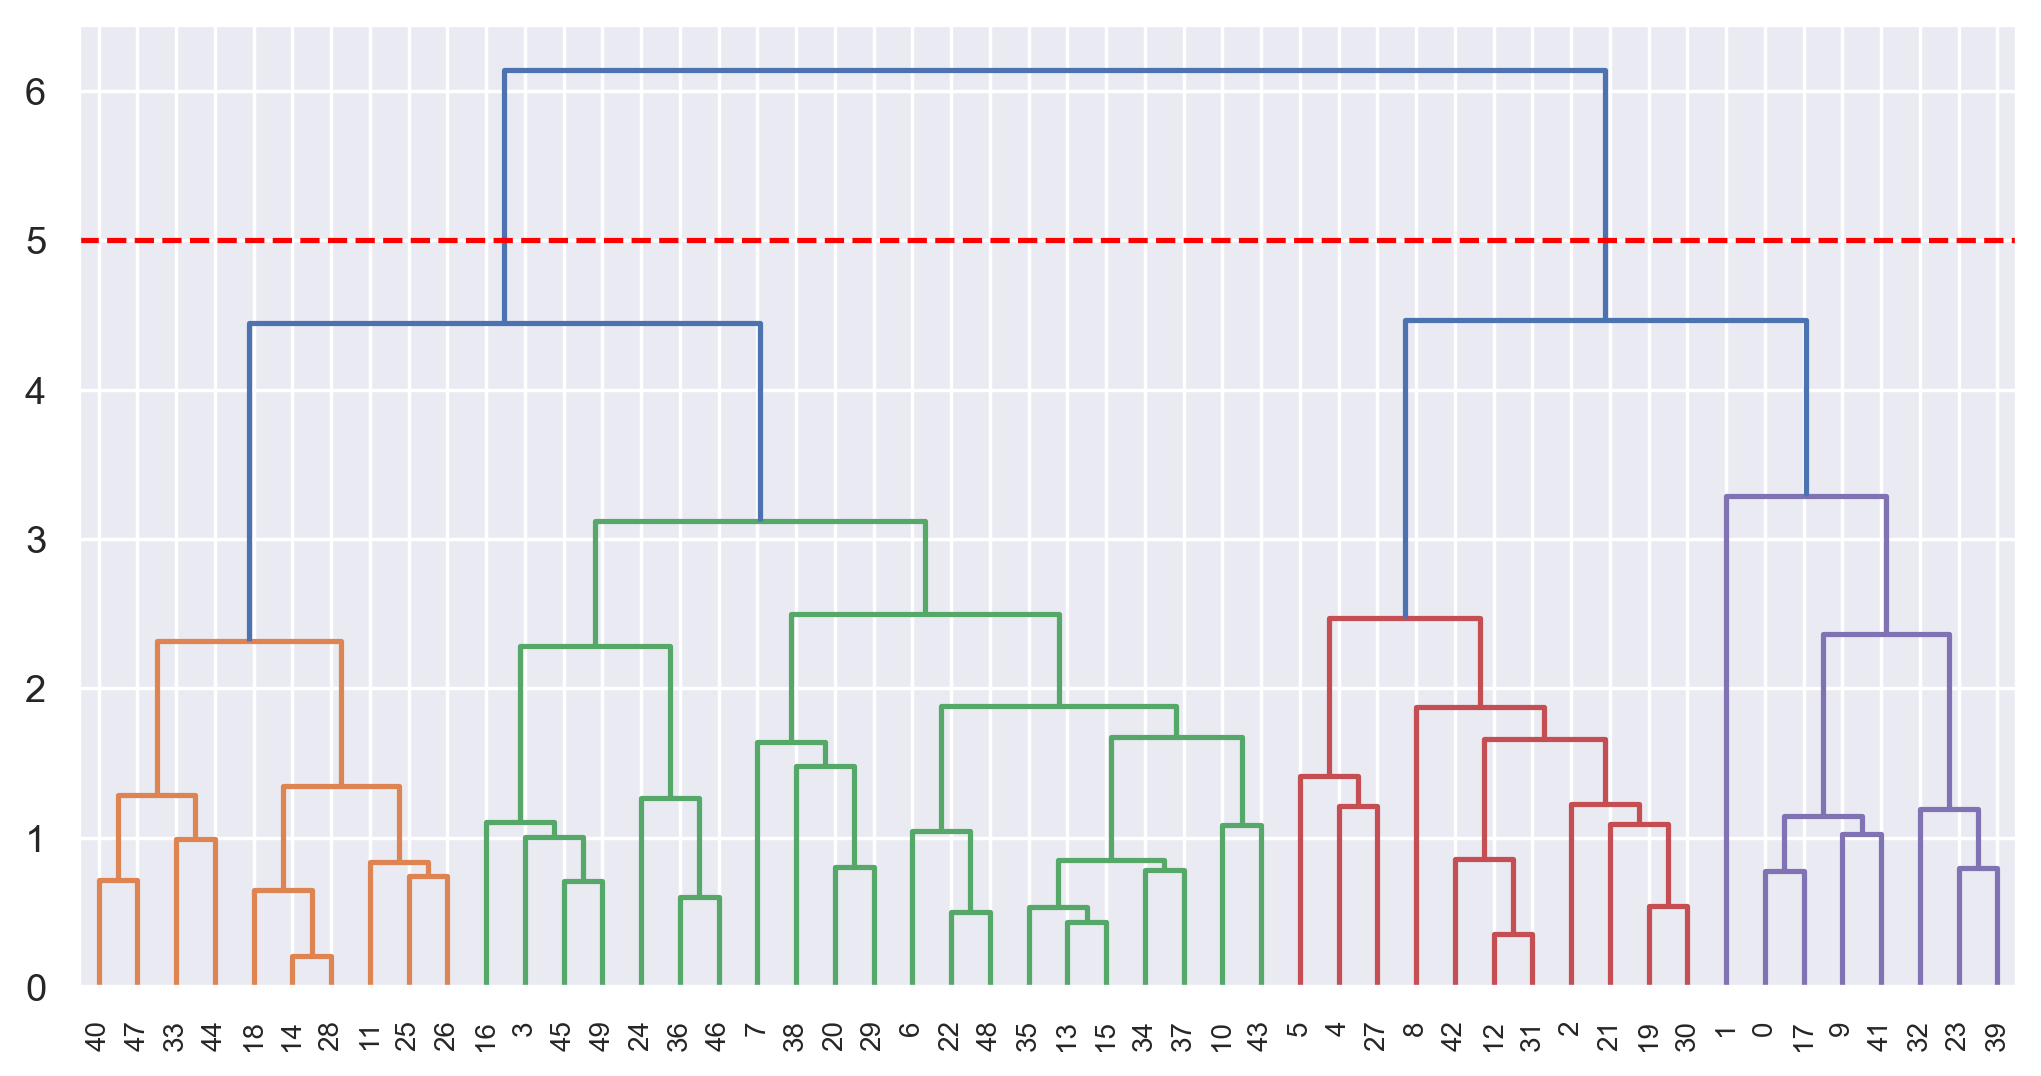

In [24]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 5, linestyle = '--', color = 'red')

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
hc = AgglomerativeClustering(n_clusters=2)
ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [29]:
len(ypred)

50

In [30]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [31]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [32]:
df[df['cluster'] == 0].mean()

Murder        5.003226
Assault     116.483871
UrbanPop     63.838710
Rape         16.338710
cluster       0.000000
dtype: float64

In [33]:
df[df['cluster'] == 1].mean()

Murder       12.331579
Assault     259.315789
UrbanPop     68.315789
Rape         29.215789
cluster       1.000000
dtype: float64

In [34]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


In [ ]:
#grouping has been done on the bases of on the similarity of their crime rates 
#across different categories (murder, assault, urban population, and rape). 
#1 being high crime rate and 0 being low crime rate 

<Axes: xlabel='UrbanPop', ylabel='Murder'>

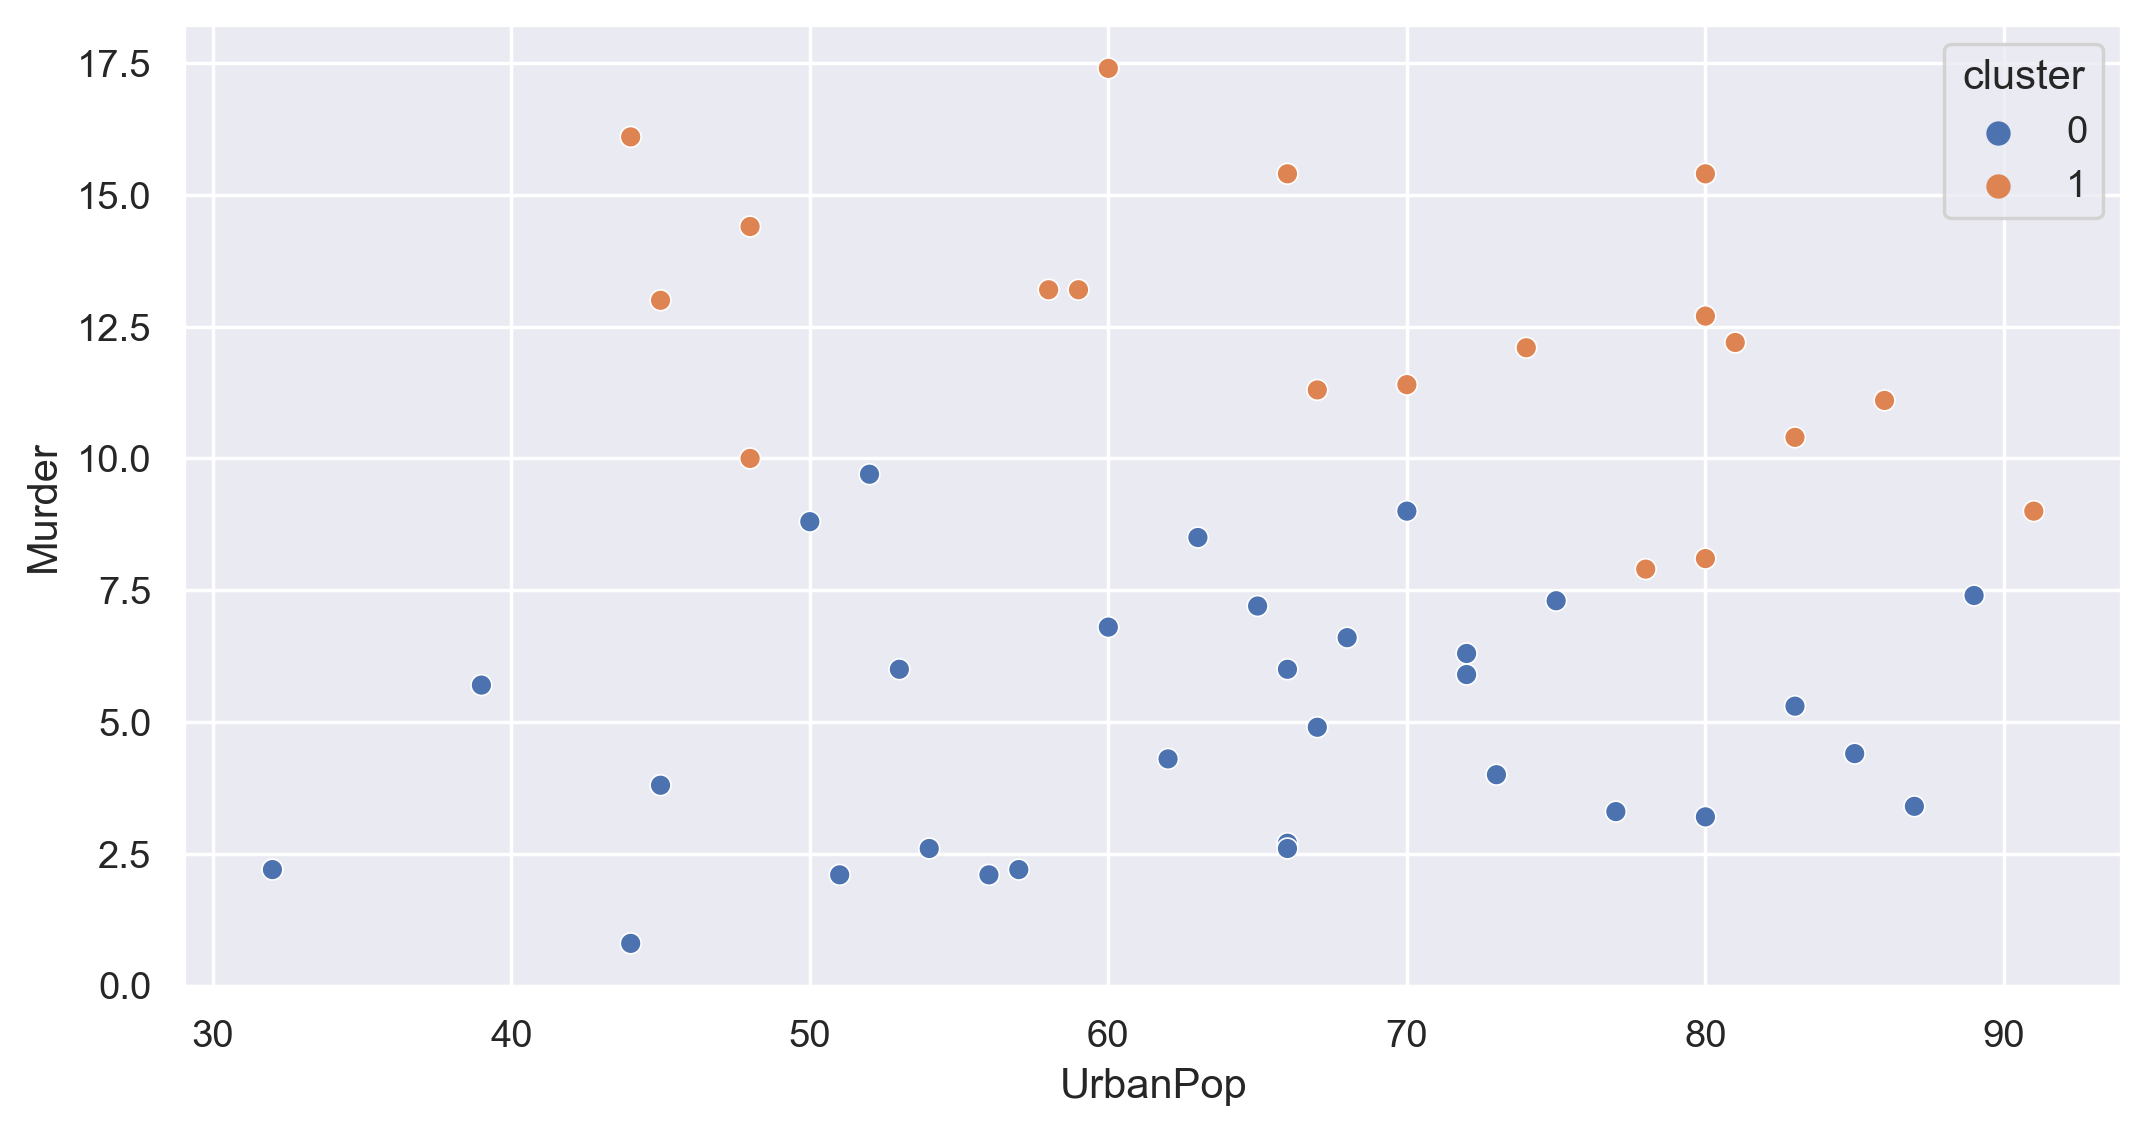

In [35]:
sns.scatterplot(x = df['UrbanPop'], y = df['Murder'], hue = df['cluster'])

In [40]:
#K-means

In [41]:
from sklearn.cluster import KMeans

In [42]:
km = KMeans() #default 8 clusters
yp = km.fit_predict(x) 
yp

array([0, 5, 2, 1, 6, 6, 7, 1, 2, 0, 4, 3, 2, 1, 3, 1, 1, 0, 3, 2, 7, 2,
       7, 0, 4, 1, 1, 6, 3, 4, 2, 2, 0, 3, 4, 1, 4, 7, 7, 0, 3, 0, 2, 4,
       3, 1, 4, 3, 7, 1], dtype=int32)

In [44]:
km.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.18739557, -0.31951486, -0.30985496, -0.35072402],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [-1.18293457, -1.19708982, -1.27640705, -1.16552107],
       [-0.44450124, -0.46462295,  0.7798216 ,  0.28311829],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-0.92878318, -0.72840338,  0.69508006, -0.91836777]])

In [46]:
km.inertia_

35.84914257315927

In [47]:
wcss = [] 

for i in range(1,11):  
    km = KMeans(n_clusters=i) 
    
    km.fit_predict(x) 
    wcss.append(km.inertia_) #predicts wcss value 

In [48]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.32802224604083,
 44.95585690291322,
 40.72609979551879,
 35.41030612394714,
 31.948792066551817,
 27.342379207179754]

Text(0.5, 1.0, 'Elbow Graph')

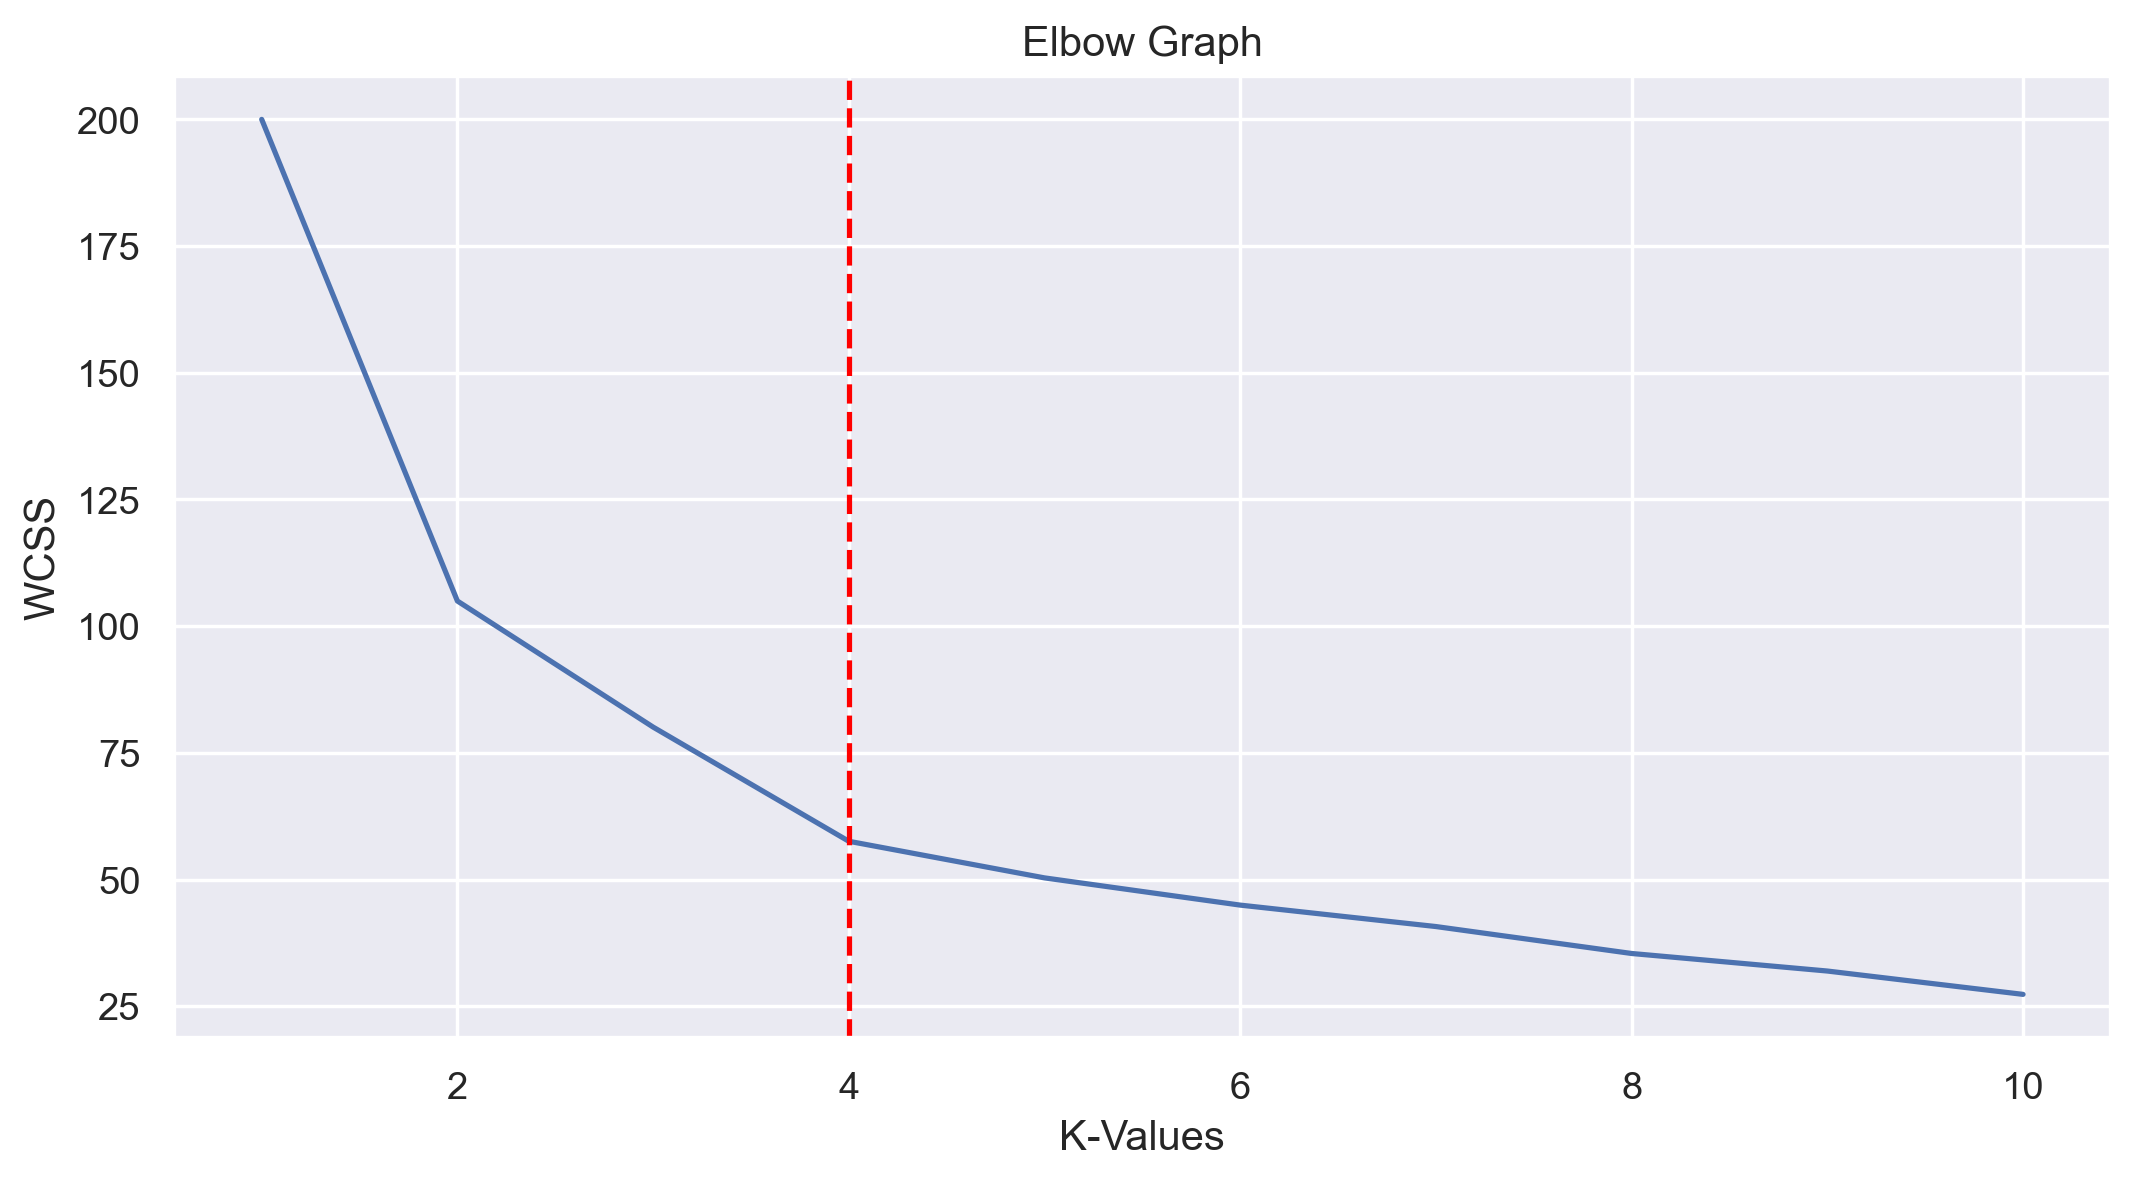

In [50]:
plt.plot(range(1,11),wcss) 
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values') 
plt.ylabel('WCSS') 
plt.title('Elbow Graph') 



In [51]:
km = KMeans(n_clusters=4) 
ypred = km.fit_predict(x) 
ypred

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [52]:
km.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [53]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(x,ypred)

0.33968891433344395

In [ ]:
#moderate ... greater than 0.7 or 0.8 is considered good
#this is due to outliers present else due to insufficient data 

In [55]:
df['cluster'] = ypred  
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [56]:
df.groupby('cluster').agg('mean') 

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,5.656250,138.875000,73.875000,18.781250


In [57]:

#cluster 0 - low crime rate 
#cluster 3 - moderate crime rate
#cluster 2 - high crime rate
#cluster 1 - very high crime rate 

In [59]:
#DBSCAN

In [60]:
df.describe() #diff between min and 25% and max and 75% - outlier present

,Murder,Assault,UrbanPop,Rape,cluster
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,1.640000
std,4.35551,83.337661,14.474763,9.366385,1.191124
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,0.250000
50%,7.25000,159.000000,66.000000,20.100000,2.000000
75%,11.25000,249.000000,77.750000,26.175000,3.000000
max,17.40000,337.000000,91.000000,46.000000,3.000000


<Axes: >

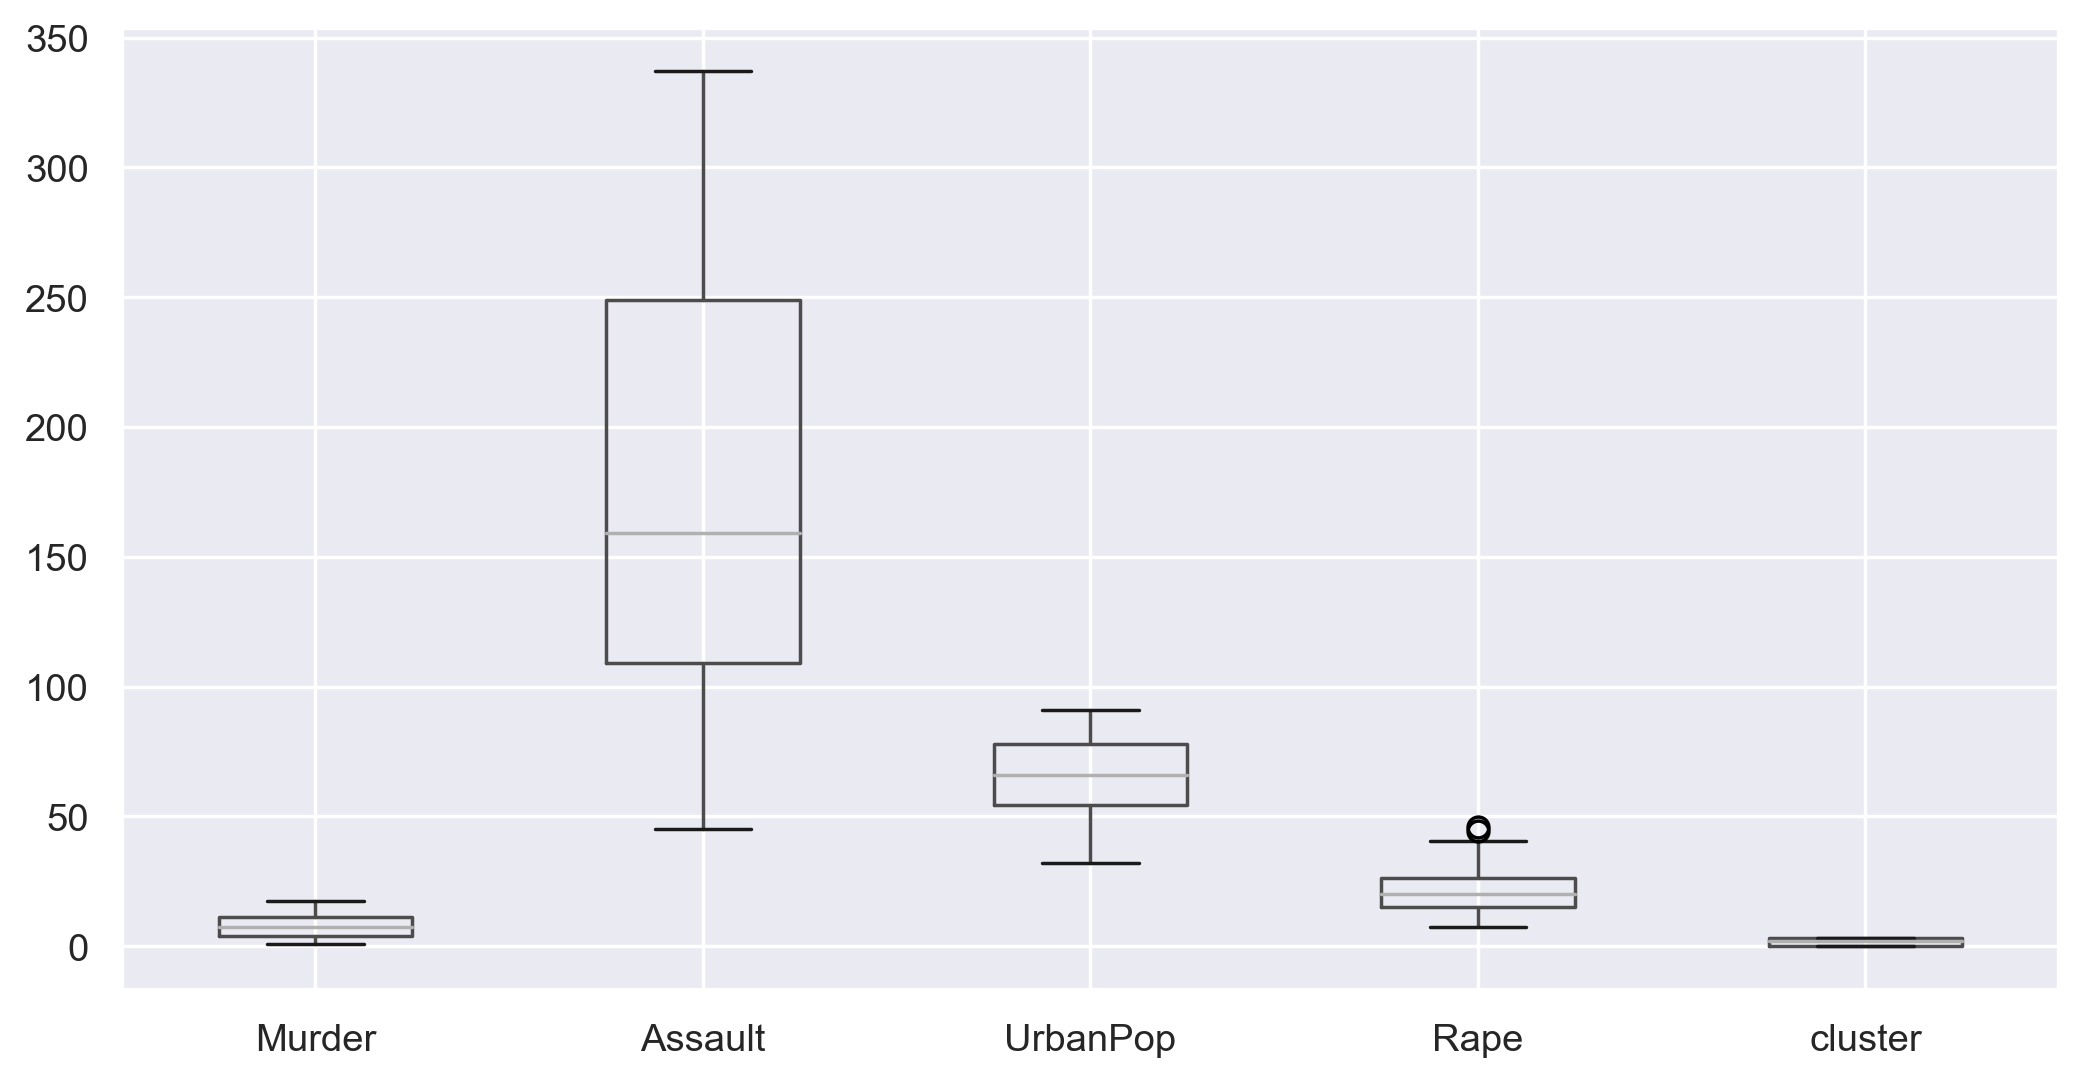

In [61]:
df.boxplot() #rape col seems to have an outlier

In [62]:
from sklearn.cluster import DBSCAN

In [115]:
db = DBSCAN(eps=2, min_samples=5)  

y = db.fit_predict(x)

In [116]:
y #-1 is outlier 

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [117]:
df['cluster'] = y 
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [118]:
from sklearn.metrics import silhouette_score

In [119]:
silhouette_score(x,y)

0.23455598753159795

In [120]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143


In [121]:
df[df['cluster']==-1] #one outlier

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,-1


In [122]:
df['cluster'].value_counts()

 0    49
-1     1
Name: cluster, dtype: int64

In [123]:
df[df['cluster']==0] 

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
10,5.3,46,83,20.2,0


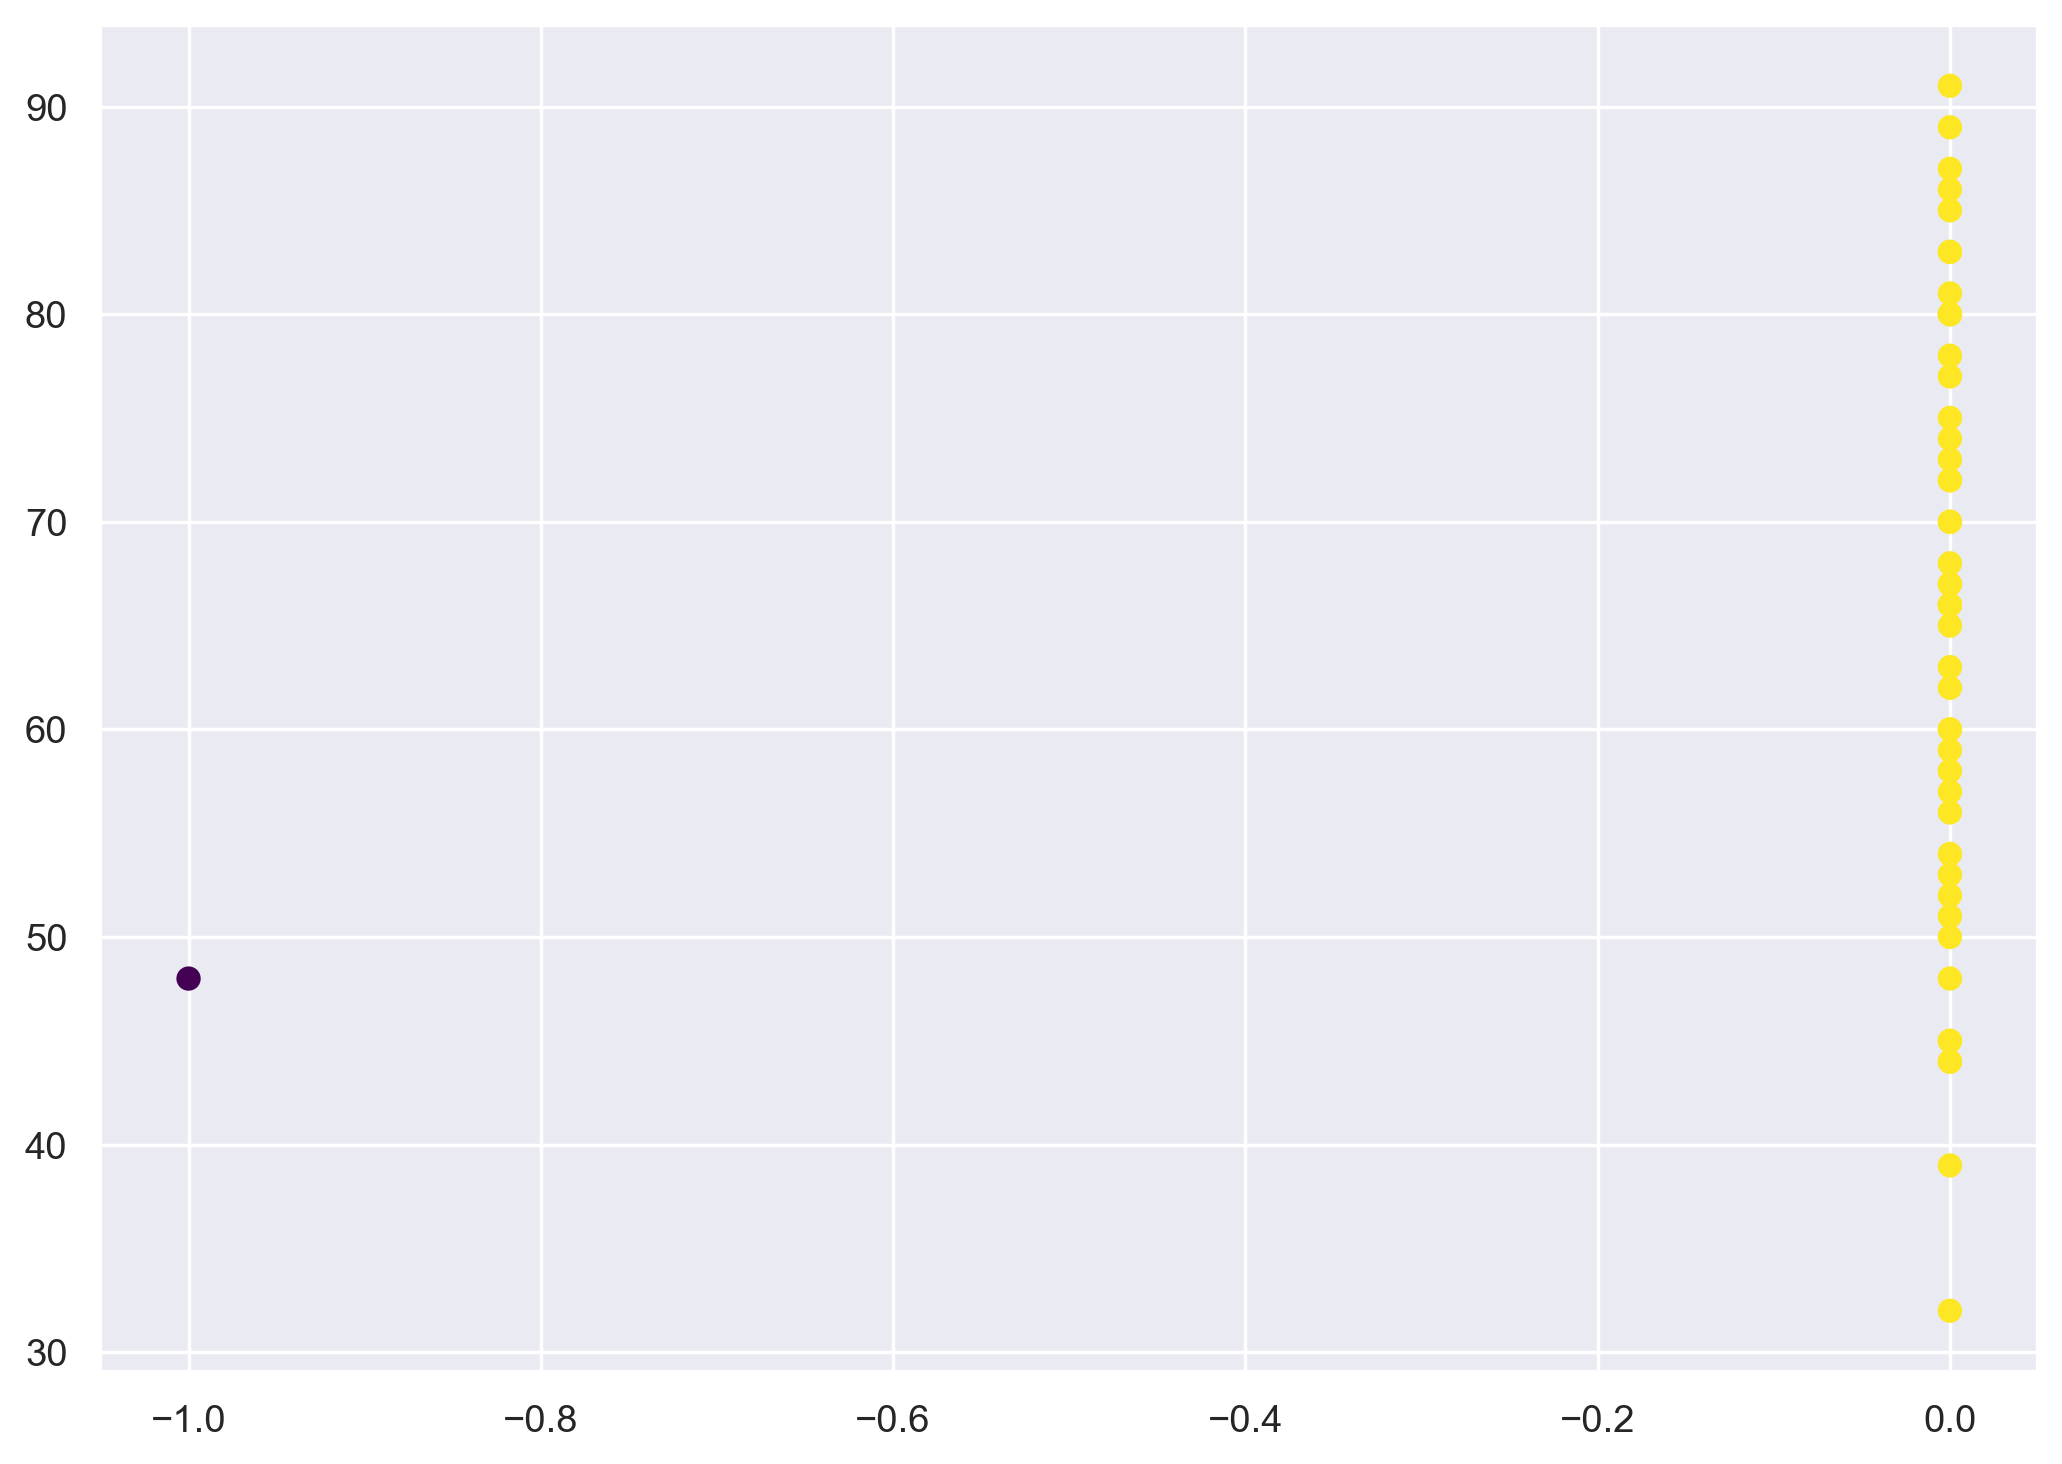

In [137]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['cluster'],df['UrbanPop'], c=db.labels_, cmap='viridis') 